### Where does the dataset come from? Download from yelp.com

### Businesses

In [777]:
import pandas as pd
import json
import re
import numpy as np
import matplotlib.pyplot as plt

In [778]:
data = []

with open('yelp_dataset/yelp_academic_dataset_business.json') as f:

    for line in f:
        
        json_dict = json.loads(line)

        if json_dict['attributes']:
            if 'BusinessParking' in json_dict['attributes'].keys():

                json_dict['attributes']['BusinessParking'] = eval(json_dict['attributes']['BusinessParking'])

        data.append(json_dict)

In [779]:
businesses = pd.json_normalize(data)

In [780]:
businesses.columns = businesses.columns.str.split(('.')).str[-1]

In [781]:
columns = []

for column in businesses.columns:
    column = re.sub(r'(\w)([A-Z])', r'\1_\2', column)
    column = re.sub(r'Restaurants_', r'', column)
    column = re.sub(r'Business_', r'', column)
    column = re.sub(r'(Range)([0-9])', r'\1', column)
    columns.append(column.lower())

businesses.columns = columns

In [782]:
# Explain why some columns are dropped (because there are too many missing values!)

businesses.drop(
  [
    'attributes',
    'hair_specializes_in',
    'counter_service',
    'open24_hours',
    'dietary_restrictions',
    'accepts_insurance',
    'ages_allowed',
    'b_yo_bcorkage',
    'corkage',
    'smoking',
    'b_yo_b',
    'good_for_dancing',
    'coat_check',
    'by_appointment_only',
    'best_nights',
    'music',
    'drive_thru',
    'accepts_bitcoin',
    'dogs_allowed',
    'happy_hour',
    'wheelchair_accessible',
    'good_for_meal',
    'ambience',
    'business_parking',
    'address',
    'postal_code',
    'hours',
    'is_open',
    'monday',
    'tuesday',
    'wednesday',
    'thursday',
    'friday',
    'saturday',
    'sunday'
  ],
  axis=1, errors='ignore', inplace=True)

In [783]:
businesses[['alcohol', 'noise_level', 'attire', 'wi_fi']] = businesses[['alcohol', 'noise_level', 'attire', 'wi_fi']].apply(lambda x: x.str.strip("u'"), axis=0)

In [784]:
def check_parking(row):
    if True in row.values:
        return 'True'
    elif False in row.values:
        return 'False'
    else:
        return np.nan

In [785]:
businesses['parking'] = businesses[['garage', 'street', 'validated', 'lot', 'valet']].apply(check_parking, axis=1)

In [786]:
businesses.drop(['garage', 'street','validated','lot','valet'], axis=1, inplace=True)

### Restaurants

In [787]:
businesses.dropna(subset='categories', inplace=True)
businesses.reset_index(drop=True, inplace=True)

In [788]:
categories = {
    'Coffee & Tea',
    'Bistros',
    'Breakfast & Brunch',
    'Cafes',
    'French',
    'Greek',
    'Italian',
    'Mexican',
    'Tacos',
    'Egyptian',
    'Pizza',
    'Soup',
    'Sushi Bars',
    'Vegetarian',
    'Waffles',
    'Food',
    'Restaurants',
    'Bars'
}

def check_categories(row):
    if set(row.split(', ')).intersection(categories):
        return True

In [789]:
restaurants = businesses[businesses['categories'].apply(check_categories) == True]

In [790]:
restaurants.reset_index(drop=True, inplace=True)

### Attributes

In [791]:
cols = ['price_range', 'attire', 'wi_fi', 'noise_level', 'alcohol']

for label in cols:
    print (restaurants[label].value_counts(), '\n')

price_range
2       29478
1       24398
3        2257
4         292
None       19
Name: count, dtype: int64 

attire
casual    38257
dressy      802
formal       70
None         38
Name: count, dtype: int64 

wi_fi
free    23903
no      18590
paid      292
None       37
Name: count, dtype: int64 

noise_level
average      25942
quiet         7448
loud          2802
very_loud     1097
None            39
Name: count, dtype: int64 

alcohol
none             20764
full_bar         15650
beer_and_wine     6176
None                38
Name: count, dtype: int64 



In [792]:
cols = ['price_range', 'attire', 'wi_fi', 'noise_level', 'alcohol']

for label in cols:
    restaurants.loc[restaurants[label] == 'None', label] = np.nan

In [793]:
restaurants = restaurants[restaurants[restaurants.columns[9:]].isna().any(axis=1) == False].replace(['none', 'None'], ['False', 'False'])

In [794]:
restaurants['alcohol'].replace(['False', 'beer_and_wine', 'full_bar'], [0, 1, 2], inplace=True)
restaurants['attire'].replace(['casual', 'dressy', 'formal'], [0, 1, 2], inplace=True)
restaurants['wi_fi'].replace(['no', 'paid', 'free'], [0, 1, 2], inplace=True)
restaurants['noise_level'].replace(['quiet', 'average', 'loud', 'very_loud'], [0, 1, 2, 3], inplace=True)

In [796]:
cols = [
    'accepts_credit_cards',
    'bike_parking', 'take_out', 'delivery', 'caters',
    'outdoor_seating', 'has_tv', 'reservations',
    'good_for_kids', 'parking', 'table_service',
    'good_for_groups']

for label in cols:
    restaurants[label] = (restaurants[label] == 'True').astype(int)  # Encodes True as 1, False as 0

In [851]:
restaurants['price_range'] = restaurants['price_range'].astype(int)
restaurants['stars'] = restaurants['stars'].astype(int)

In [854]:
cols = restaurants.columns[9:].to_list()
cols.append('stars')
cols

['accepts_credit_cards',
 'bike_parking',
 'price_range',
 'take_out',
 'delivery',
 'caters',
 'wi_fi',
 'outdoor_seating',
 'has_tv',
 'reservations',
 'alcohol',
 'good_for_kids',
 'parking',
 'attire',
 'table_service',
 'good_for_groups',
 'noise_level',
 'stars']

In [855]:
for label in cols:
    print(label)
    try:
        print(np.isinf(restaurants[label]).values.sum(), '\n')
    except:
        print('{} could not be inspected'.format(label), '\n')

accepts_credit_cards
0 

bike_parking
0 

price_range
0 

take_out
0 

delivery
0 

caters
0 

wi_fi
0 

outdoor_seating
0 

has_tv
0 

reservations
0 

alcohol
0 

good_for_kids
0 

parking
0 

attire
0 

table_service
0 

good_for_groups
0 

noise_level
0 

stars
0 



In [798]:
import seaborn as sns

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_ol

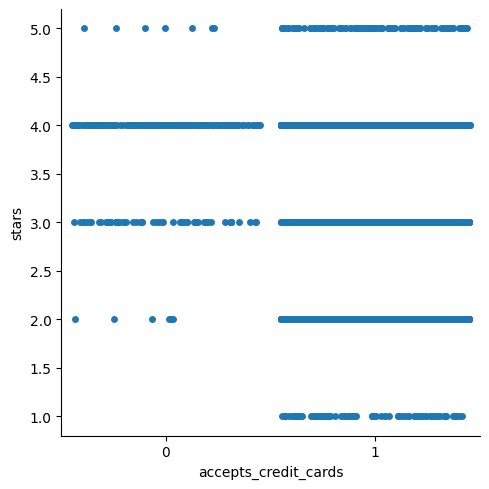

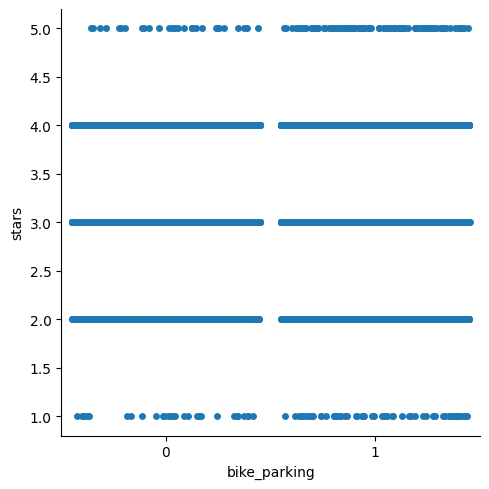

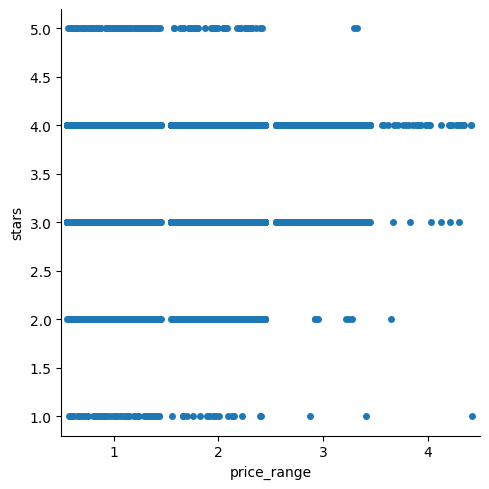

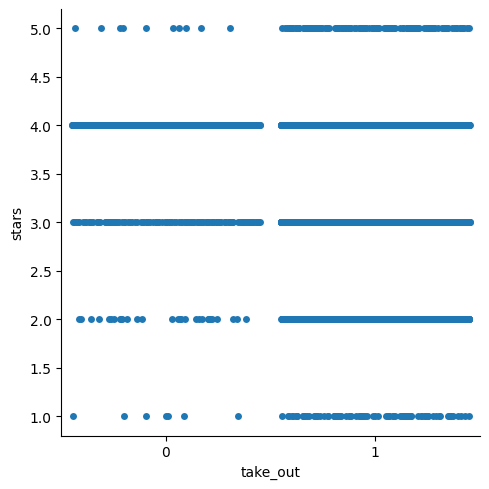

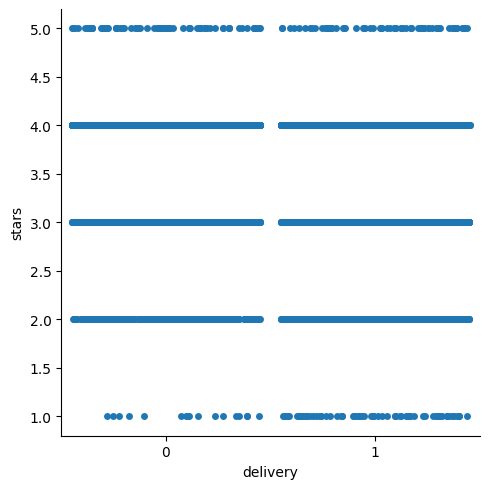

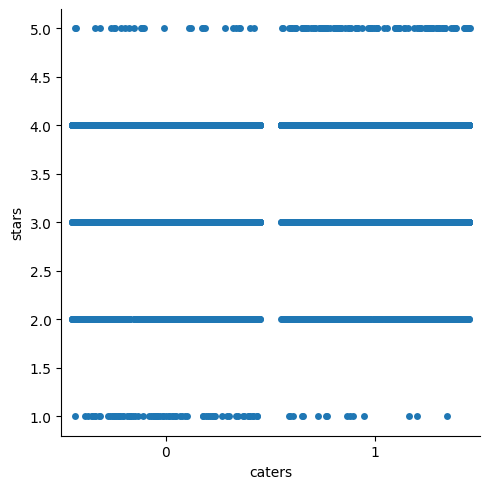

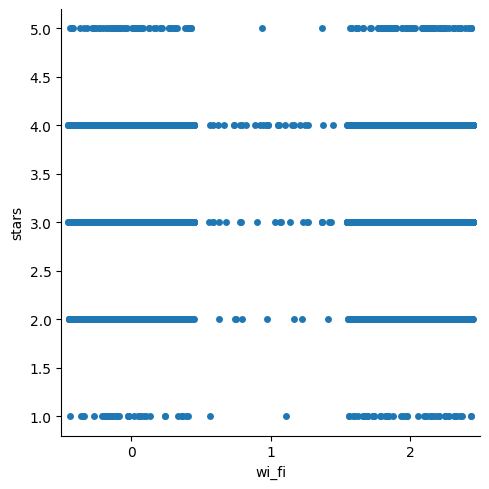

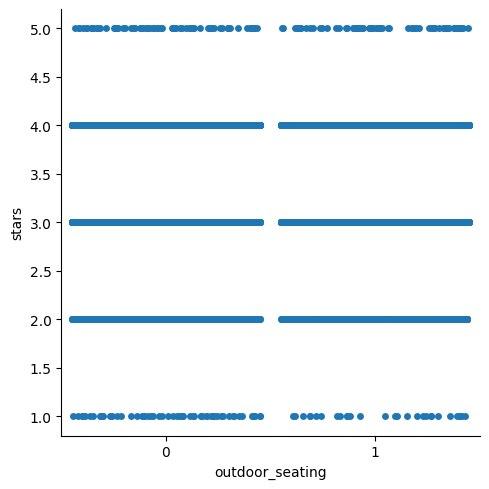

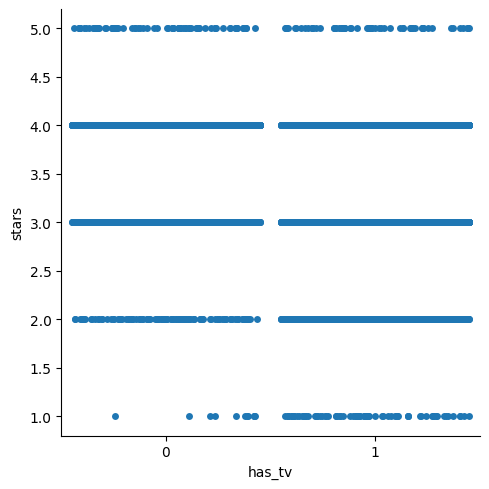

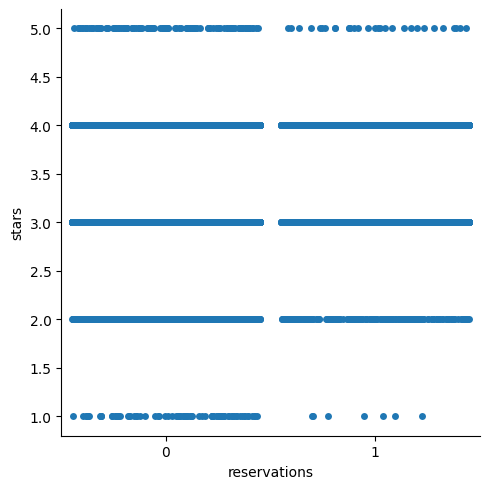

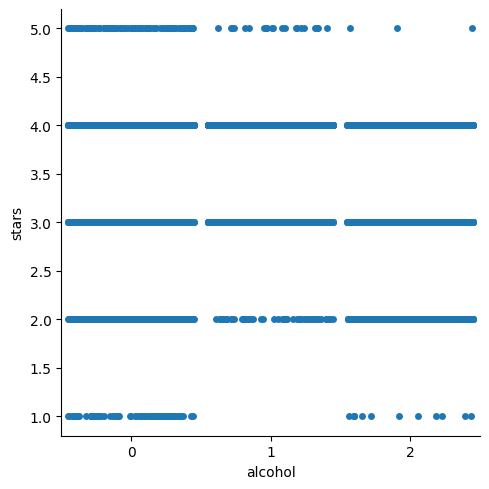

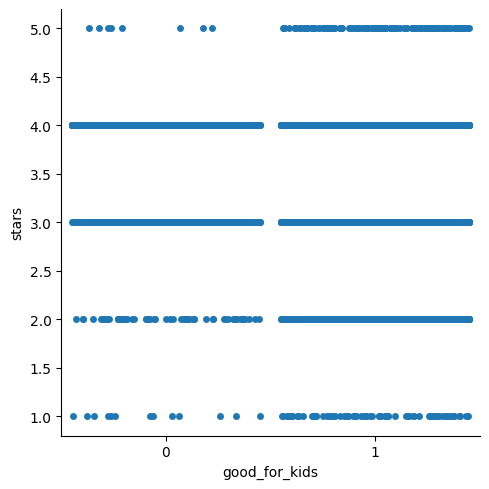

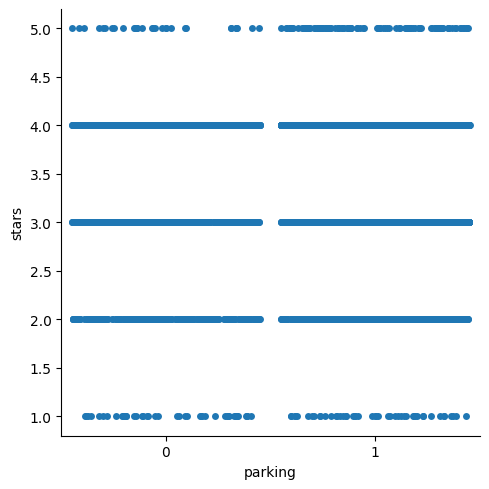

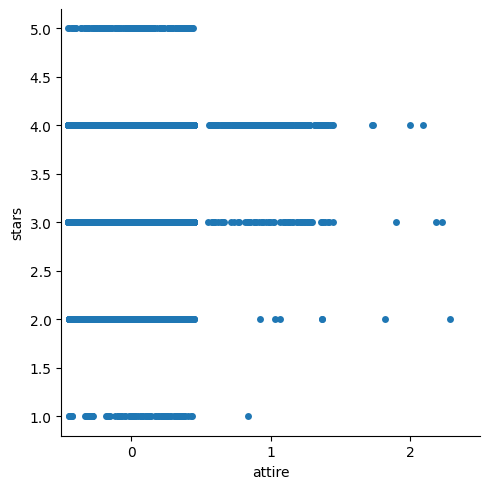

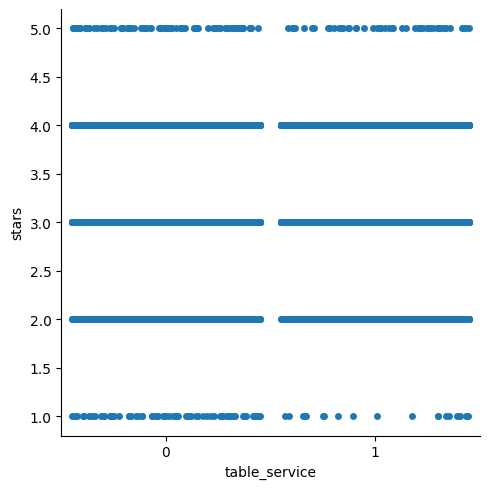

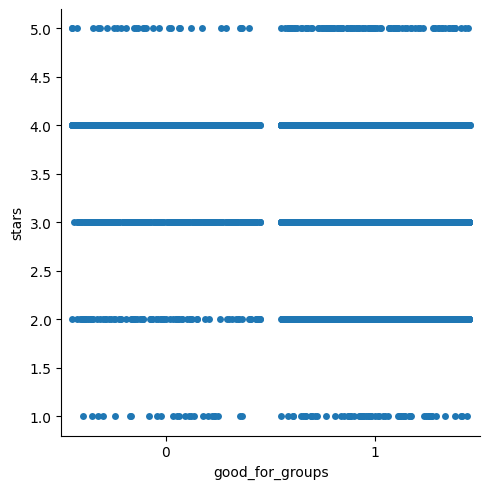

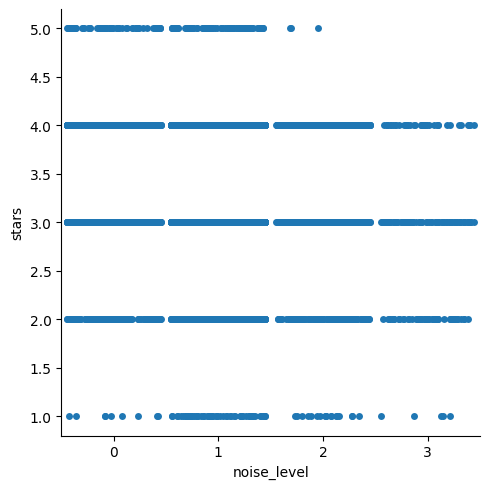

In [856]:
for label in restaurants.columns[9:]:
    sns.catplot(restaurants, x=label, y='stars', jitter=0.45)
    sns.despine();

In [100]:
restaurants.groupby(by='stars').count()

,business_id,name,city,state,latitude,longitude,review_count,categories,accepts_credit_cards,bike_parking,...,outdoor_seating,has_tv,reservations,alcohol,good_for_kids,parking,attire,table_service,good_for_groups,noise_level
stars,,,,,,,,,,,,,,,,,,,,,
1.0,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
1.5,82,82,82,82,82,82,82,82,82,82,...,82,82,82,82,82,82,82,82,82,82
2.0,264,264,264,264,264,264,264,264,264,264,...,264,264,264,264,264,264,264,264,264,264
2.5,647,647,647,647,647,647,647,647,647,647,...,647,647,647,647,647,647,647,647,647,647
3.0,1378,1378,1378,1378,1378,1378,1378,1378,1378,1378,...,1378,1378,1378,1378,1378,1378,1378,1378,1378,1378
3.5,2907,2907,2907,2907,2907,2907,2907,2907,2907,2907,...,2907,2907,2907,2907,2907,2907,2907,2907,2907,2907
4.0,4269,4269,4269,4269,4269,4269,4269,4269,4269,4269,...,4269,4269,4269,4269,4269,4269,4269,4269,4269,4269
4.5,2254,2254,2254,2254,2254,2254,2254,2254,2254,2254,...,2254,2254,2254,2254,2254,2254,2254,2254,2254,2254
5.0,141,141,141,141,141,141,141,141,141,141,...,141,141,141,141,141,141,141,141,141,141


In [ ]:
def transform_dataset(dataframe):
    
    X = dataframe[dataframe[dataframe.columns[9:]].isna().any(axis=1) == False][dataframe.columns[9:]].replace(['none', 'None'], ['False', 'False'])
    X = X.values

    # make_label = LabelEncoder()
    # X = make_label.fit_transform(X)

    y = dataframe['stars'][dataframe[dataframe.columns[9:]].isna().any(axis=1) == False]

    data = np.hstack((X, np.reshape(y, (-1, 1))))

    return data, X, y

In [ ]:
train, X_train, y_train = transform_dataset(restaurants)

In [ ]:
y_train

In [ ]:
plt.scatter(X['alcohol'], restaurants['stars'])

In [ ]:
make_label = LabelEncoder()

X = make_label.fit_transform(X)

In [ ]:
np.unique(X)

In [ ]:
train, train_X, train_y = transform_dataset(restaurants)

In [ ]:
from sklearn.feature_selection import f_regression

In [ ]:
f_statistic, p_values = f_regression(train_X, train_y)

In [ ]:
for label in restaurants.columns[9:]:
    display(pd.crosstab(restaurants[label][restaurants[label].notna()], restaurants['stars'][restaurants[label].notna()], margins=True, normalize='columns'))

In [ ]:
from sklearn.feature_selection import f_regression

In [ ]:
data_table_service = restaurants[['table_service', 'stars']][restaurants['table_service'].notna()]

In [ ]:
data_table_service

In [ ]:
data_table_service['table_service'] = (data_table_service['table_service'] == 'True').astype(int)

In [ ]:
X = np.reshape(data_table_service['table_service'], (-1, 1))
y = data_table_service['stars']

In [ ]:
y

In [ ]:
data_table_service['stars']

In [ ]:
f_statistic, p_values = f_regression(X, y)

In [ ]:
f_statistic

In [ ]:
for i in range(len(f_statistic)):
    print(f"Feature {i + 1}: F-statistic = {f_statistic[i]}, P-value = {p_values[i]}")

In [ ]:
with open('tables/restaurants_pennsylvania.csv', 'w') as f:
    restaurants.to_csv(f, header=True, index=False)

### We have created a table with all restaurants in Pennsylvania and saved it in a .csv for later analysis

### Now we load the table with all reviews and create a .csv which only contains reviews from restaurants in Pennsylvania

In [ ]:
businesses_ids = restaurants['business_id'].to_list()

column_names = ['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny', 'cool', 'text', 'date']

chunks = pd.read_json('yelp_dataset/yelp_academic_dataset_review.json', lines=True, chunksize=100000)

with open('tables/reviews_pennsylvania.csv', 'w') as f:
    header = ','.join(column_names)
    f.write(header + '\n')

    for chunk in chunks:
        reviews = pd.DataFrame(chunk)
        
        reviews[reviews['business_id'].isin(businesses_ids)].to_csv(f, mode='a', header=False, index=False)

### Analysis starts here

In [ ]:
restaurants = get_file('tables/restaurants_pennsylvania.csv')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, figsize=(5, 5))

# fig.suptitle('Customer ratings', fontsize=16)

sns.barplot(
    ax = ax,
    x=restaurants['stars'].value_counts().sort_index().index,
    y=restaurants['stars'].value_counts().sort_index().values*100/restaurants['stars'].value_counts().sort_index().values.sum(),
    color='#FF1A1A'
)
ax.set(xlabel='Stars', ylabel='No. of businesses in %')
ax.set_title('Star ratings');

In [ ]:
restaurants[[
    'stars',
    'accepts_credit_cards',
    'bike_parking',
    'price_range',
    'take_out',
    'delivery',
    'caters',
    'wi_fi',
    'outdoor_seating',
    'has_tv',
    'reservations',
    'alcohol',
    'good_for_kids',
    'attire',
    'table_service',
    'good_for_groups',
    'noise_level',
    'parking_available'
]].corr(method='spearman')

In [ ]:
reviews = get_file('tables/reviews_pennsylvania.csv')

In [ ]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

nlp = spacy.load('en_core_web_md')
nlp.add_pipe('spacytextblob')

def check_polarity(text):
    doc = nlp(text)
    return doc._.blob.polarity

reviews['polarity'] = reviews['text'][:10000].apply(lambda x: check_polarity(x))

In [ ]:
with open('tables/reviews_polarity.csv', 'w') as f:
    reviews[:10000].to_csv(f, header=True, index=False)

In [ ]:
reviews = get_file('tables/reviews_polarity.csv')

In [ ]:
negative_reviews = reviews[reviews['polarity'] < 0]

### Analys negative reviews

#### We want to find statements about food

In [ ]:
# Training the entity rule to recognize food

food = pd.read_csv('food_labels/food.csv')

In [ ]:
food_labels = food[food['description'].str.contains('[a-zA-Z]') == True]['description']

In [ ]:
food_labels = food_labels[food_labels.str.split().apply(len) <= 2].drop_duplicates()

In [ ]:
food_labels = food_labels.str.lower()

In [ ]:
food_labels = food_labels[food_labels.str.contains('.*,.*,.*', regex=True) == False]

In [ ]:
# Fix: Foods are comma seperated and order is reversed: 'muffins, blueberry' become 'blueberry muffins'

food_labels[food_labels.str.contains(', ') == True] = (
    food_labels[food_labels.str.contains(', ') == True].str.split(', ', expand=True)[1] +
    ' ' +
    food_labels[food_labels.str.contains(', ') == True].str.split(', ', expand=True)[0]
)

food_labels[food_labels.str.contains(',') == True] = (
    food_labels[food_labels.str.contains(',') == True].str.split(',', expand=True)[1] +
    ' ' +
    food_labels[food_labels.str.contains(',') == True].str.split(',', expand=True)[0]
)

In [ ]:
# If label has no plural, create singular form. If label has no singular, create plural 

import spacy
import lemminflect

nlp = spacy.load('en_core_web_lg')

inflected_labels = []

for label in food_labels:
    
    doc = nlp(label)

    if len(doc) == 1:
        if doc[0].tag_ == 'NNS':
            inflected_labels.append(doc[0]._.inflect('NN'))
        else:
            inflected_labels.append(doc[0]._.inflect('NNS'))

    if len(doc) == 2:
        if doc[1].tag_ == 'NNS':
            inflected_labels.append(doc[0].text + ' ' + doc[1]._.inflect('NN'))
        else:
            inflected_labels.append(doc[0].text + ' ' + doc[1]._.inflect('NNS'))

In [ ]:
food_labels_inflected = pd.Series(inflected_labels)

In [ ]:
food_labels = pd.concat([food_labels, food_labels_inflected])

In [ ]:
food_labels.drop_duplicates(inplace=True)

In [ ]:
food_labels[food_labels.str.contains('bar', regex=True)]

In [ ]:
# Add food labels to entity ruler

food_labels = food_labels  # Remove 'bar' from foods_labels, add 'product'

patterns = []

nlp = spacy.load('en_core_web_lg')

ruler = nlp.add_pipe('entity_ruler', before='ner')

for label in food_labels:
    patterns.append({'label': 'FOOD', 'pattern': label})

ruler.add_patterns(patterns)

In [ ]:
len(patterns)

In [ ]:
ruler.to_disk('food_labels/food_patterns.jsonl')

In [ ]:
nlp = spacy.load('en_core_web_lg')

ruler = nlp.add_pipe("entity_ruler", before='ner')

ruler.from_disk('food_labels/food_patterns.jsonl')